# PS4

## Xinyu Chang

In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.decomposition import PCA
from matplotlib.image import imread
from sklearn.cluster import KMeans
from matplotlib.image import imread

## 1. Principal Component Analysis

### 1.1 Scatterplot

In [2]:
Boston_df = pd.read_csv('housing_data.csv')
Boston_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
X = Boston_df[['crim']]
y = Boston_df['medv']

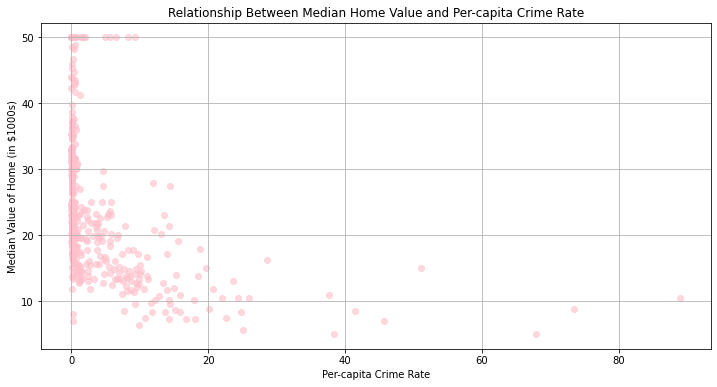

In [4]:
plt.figure(figsize=(12,6))
plt.scatter(X, y, alpha=0.6, color="pink")
plt.title("Relationship Between Median Home Value and Per-capita Crime Rate")
plt.xlabel("Per-capita Crime Rate")
plt.ylabel("Median Value of Home (in $1000s)")
plt.grid(True)
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=42)

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [8]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

rmse_train,rmse_test

(8.75564310331614, 7.936257817341226)

The RMSE for the training data set is 8.76 and the RMSE for the test set is 7.94.

### 1.2 Features and plots

In [9]:
selected = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis']

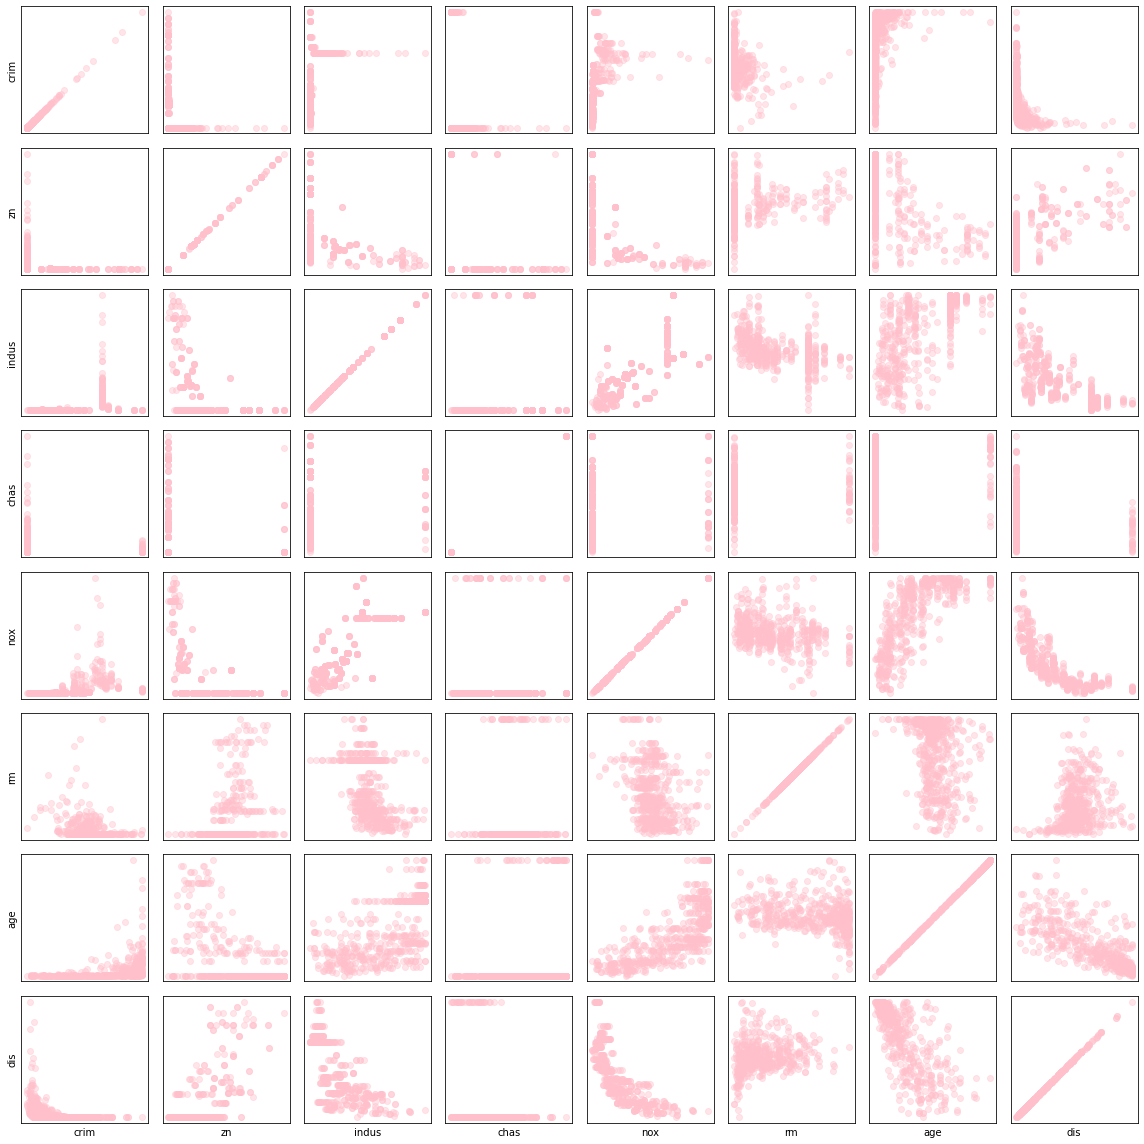

In [11]:
plt.figure(figsize=(16,16))
for i in range(8):
    for j in range(8):
        plt.subplot(8, 8, i * 8 + j + 1)
        plt.scatter(Boston_df[selected[i]], Boston_df[selected[j]], alpha=0.4, color="pink")
        if j == 0:
            plt.ylabel(selected[i])
        if i == 7:
            plt.xlabel(selected[j])
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()
plt.show()

### 1.3 PCA to the rescue

In [12]:
all_features = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']
X_all_features = Boston_df[all_features]

In [13]:
X_train, _ = train_test_split(X_all_features, test_size=0.34, random_state=42)

In [14]:
pca = PCA(n_components=12)
pca.fit(X_train)

PCA(n_components=12)

In [15]:
variance = np.cumsum(pca.explained_variance_ratio_)

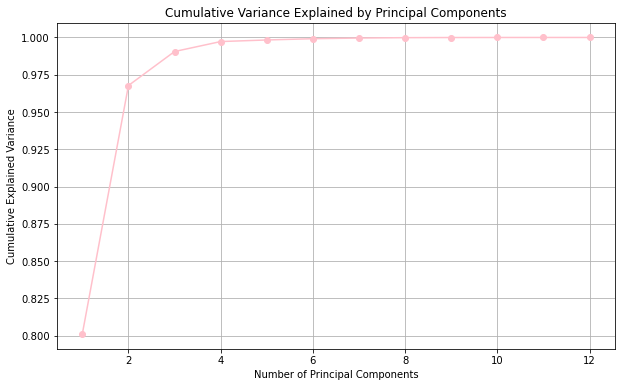

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 13), variance, marker='o', color="pink")
plt.title("Cumulative Variance Explained by Principal Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

### 1.4 Visualizing the components

In [18]:
pca_2 = PCA(n_components=2)
X_train_pca = pca_2.fit_transform(X_train)

In [20]:
y_train = Boston_df.loc[X_train.index, 'medv']

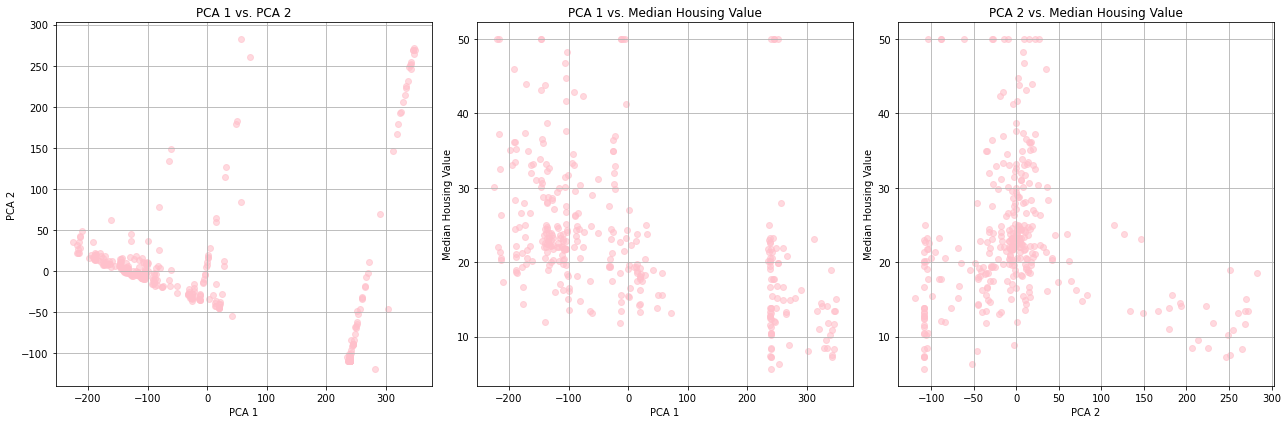

In [21]:
plt.figure(figsize=(18, 6))

# 1.4.a PCA 1 vs. PCA 2
plt.subplot(1, 3, 1)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], alpha=0.6, color="pink")
plt.title("PCA 1 vs. PCA 2")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)

# 1.4.b PCA 1 vs. Median Housing Value
plt.subplot(1, 3, 2)
plt.scatter(X_train_pca[:, 0], y_train, alpha=0.6, color="pink")
plt.title("PCA 1 vs. Median Housing Value")
plt.xlabel("PCA 1")
plt.ylabel("Median Housing Value")
plt.grid(True)

# 1.4.c PCA 2 vs. Median Housing Value
plt.subplot(1, 3, 3)
plt.scatter(X_train_pca[:, 1], y_train, alpha=0.6, color="pink")
plt.title("PCA 2 vs. Median Housing Value")
plt.xlabel("PCA 2")
plt.ylabel("Median Housing Value")
plt.grid(True)

plt.tight_layout()
plt.show()

### 1.5 Regression and PCA

In [22]:
pca_1 = PCA(n_components=1)

In [23]:
X_all_pca = pca_1.fit_transform(X_all_features)

In [25]:
X_train_pca_1, X_test_pca_1 = train_test_split(X_all_pca, test_size=0.34, random_state=42)
y_train, y_test = train_test_split(Boston_df['medv'], test_size=0.34, random_state=42)

In [26]:
model_pca = LinearRegression()
model_pca.fit(X_train_pca_1, y_train)

LinearRegression()

In [27]:
y_train_pred_pca = model_pca.predict(X_train_pca_1)
y_test_pred_pca = model_pca.predict(X_test_pca_1)

In [28]:
rmse_train_pca = np.sqrt(mean_squared_error(y_train, y_train_pred_pca))
rmse_test_pca = np.sqrt(mean_squared_error(y_test, y_test_pred_pca))
rmse_train_pca, rmse_test_pca

(8.32847918732322, 7.454418087779348)

When we project the data using only the first Principal Component and perform regression analysis, the RMSE are approximately **8.33** for the training set and **7.45** for the test set. In comparison to the results from section 1.1, where we conducted a regression analysis using only the per-capita crime rate, yielding RMSEs of **8.76** for the training set and **7.94** for the test set. For the training set, the RMSE is slightly lower when using the single principal component (8.33) as opposed to just the per-capita crime rate (8.76). This suggests that the first principal component, which captures information from multiple features, explains the median housing price better than the per-capita crime rate alone in the training data. Similarly, for the test set, the model using the first principal component (7.45) outperforms the model using only the per-capita crime rate (7.94) in terms of RMSE. These findings indicate that the first principal component may capture key information related to the median housing price from multiple features. Despite some loss of information due to not utilizing all available features, this approach still manages to provide a prediction performance that is comparably better than using a single feature. **This might be attributed to the fact that principal component analysis captures the most significant variance from the original features, thereby simplifying the model.**

---------------------------------------------

## 2 Cluster images

### 2.1 Decompress and explore

#### a) Decompress and inspect the images to get an idea about what we are analyzing. Use whatever image viewer you like. What do you see?

In the folder, there are a variety of data visualizations graphs typically used to represent statistical data. These visualizations include pie charts, bar charts, line graphs, scatter plots, radar Charts, etc. Each chart provides a visual representation of data and can be used to detect patterns, trends, and outliers. The collection of images seems to cover a wide range of topics, as indicated by the labels and legends within each chart.

#### b) First read all the file names (these are hashcodes) into your code. You can get a list of files with.How many images are there? Compute the answer by coding and provide the script.

In [29]:
import os

In [30]:
folder = 'visualizations'
files = os.listdir(folder)

In [31]:
len(files)

929

There are 929 images in the folder.

### 2.2 Load and cluster

#### a) Load images. We strongly recommend you start with a small sample of images (e.g., 100 images). After everything runs properly, then you can increase the sample size –note that clustering all the data points might be slow (5-10min).

In [32]:
images = np.random.choice(files, 100) # smaller sample for speed
im1 = imread(os.path.join(folder, images[0]))
imshape = im1.shape
X = np.empty(shape=(len(images), imshape[0]*imshape[1]*imshape[2]))
for i, img in enumerate(images):
    pixels = imread(os.path.join(folder, img))
    X[i,:] = pixels.ravel()

In [33]:
print(X.shape)

(100, 1134756)


#### b) Select k and run clustering. This may be slow so don’t start with the full set. Using a subset of 100 images takes 12 seconds on an i7-3770 desktop.Warning: scaling may not be linear, in particular when you run out of memory!

In [34]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
clusters = kmeans.labels_
print(clusters)

/Users/changxinyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[1 0 1 2 4 1 1 1 4 4 1 4 4 0 1 4 0 4 1 4 1 0 4 4 4 1 0 2 0 4 0 0 1 1 0 1 0
 4 4 4 4 4 0 1 4 4 1 0 1 4 4 0 3 4 1 4 4 0 1 2 4 1 4 0 4 4 1 1 4 1 4 4 2 1
 1 1 2 4 4 4 0 0 4 2 4 4 4 1 4 4 4 2 1 1 2 4 4 4 0 4]


### 2.3 Analyze the clusters

#### 2.3.1  group the clusters: this will create an array of cluster labels, one label for each cluster.

In [35]:
cluster_groups = {i: [] for i in range(k)}

In [107]:
for i, cluster_label in enumerate(clusters):
    cluster_groups[cluster_label].append(i)

#### 2.3.2 inspect the images in each cluster. Describe what you see and how clusters differ from each other.

In [108]:
def plotcluster(X, cl, c, imshape):
    plt.figure(figsize=(15, 8))
    plt.suptitle('Cluster ' + str(c), fontsize=16)
    Xcl = X[cl == c]
    inds = np.random.choice(Xcl.shape[0], min(6, Xcl.shape[0]), replace=False)
    
    for i, ind in enumerate(inds):
        ax = plt.subplot(2, 3, i+1)
        img_array = Xcl[ind, :].reshape(imshape)
        ax.imshow(img_array)

    plt.show()

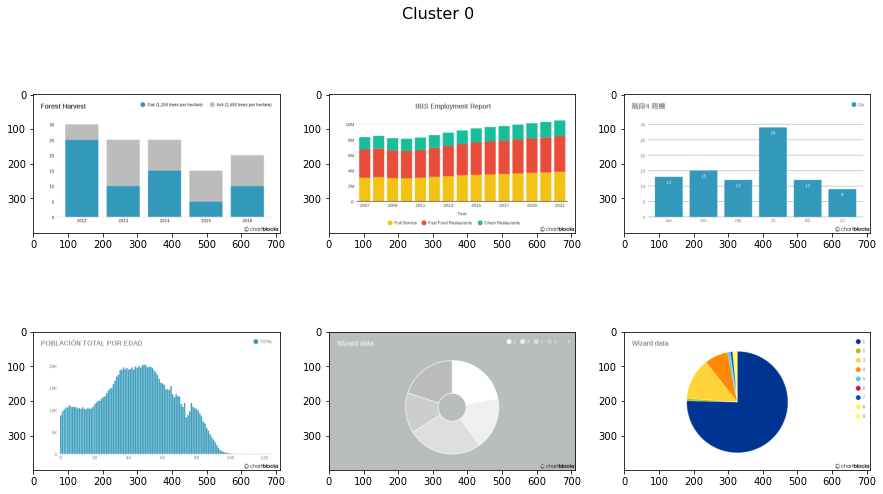

In [109]:
plotcluster(X, clusters, 0, imshape)

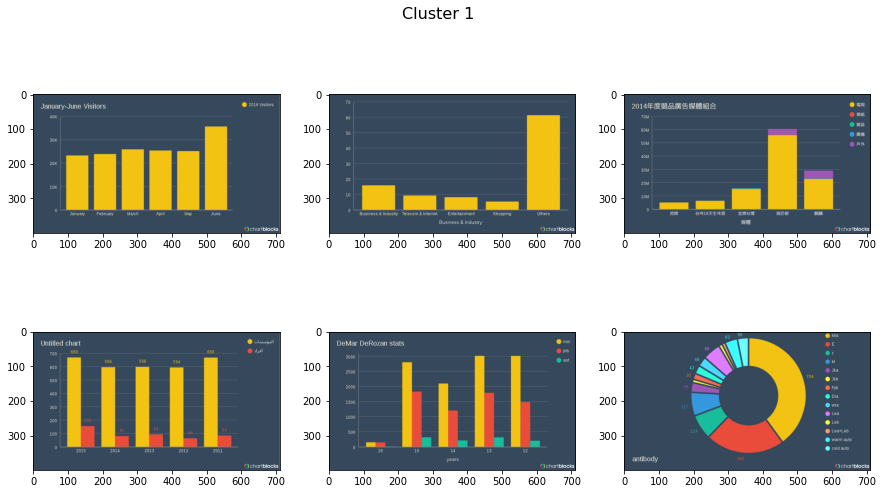

In [110]:
plotcluster(X, clusters, 1, imshape)

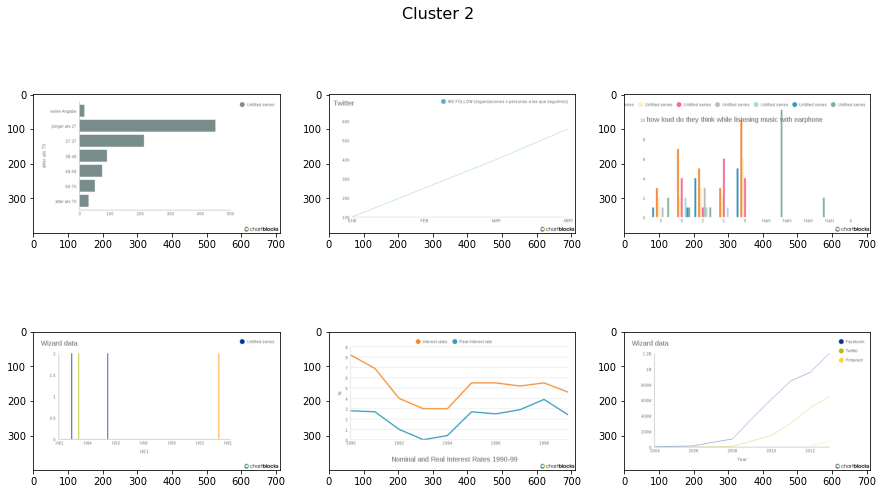

In [111]:
plotcluster(X, clusters, 2, imshape)

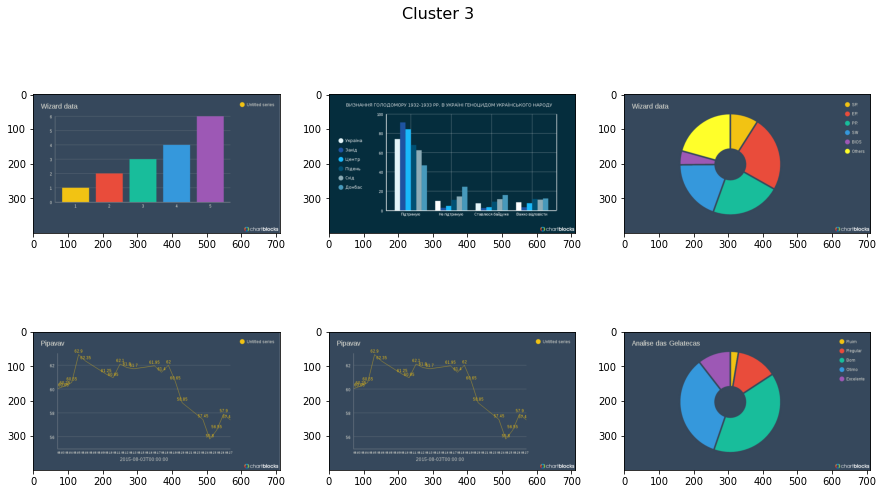

In [112]:
plotcluster(X, clusters, 3, imshape)

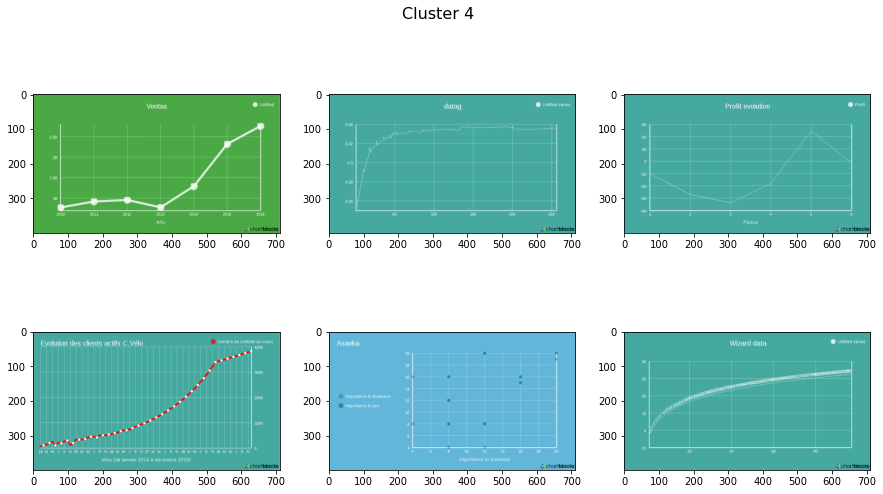

In [113]:
plotcluster(X, clusters, 4, imshape)

Based on the clusters displayed in the uploaded images：  

**(1) Cluster 0:** This cluster seems to contain a variety of chart types, including bar charts, pie charts, and a radar chart. The common characteristic among these visualizations could be the use of multiple colors to represent different data categories or series. The presence of both categorical (e.g., bar charts) and numerical distributions (e.g., pie charts) suggests that the clustering algorithm might not be distinguishing between these types but rather grouping based on color usage and layout density.  
**(2) Cluster 1:** Cluster 1 primarily consists of bar charts, with one pie chart also present. The bar charts in this cluster appear to have a strong, uniform color theme, usually with bars of the same color. The charts here have less color variation compared to Cluster 0, which might be why they've been grouped together.  
**(3) Cluster 2:** This cluster includes line charts and a histogram. The shared feature among these images seems to be the presence of trend lines and points spread across a continuous range. This suggests that the cluster may be capturing the continuity of data points and the presence of lines in the visualizations.  
**(4) Cluster 3:** The visualizations in Cluster 3 are quite diverse, including bar charts, line charts, and pie charts. However, one commonality might be that these visualizations have significant white space or single-color backgrounds, making the charts' features stand out more prominently.  
**(5) Cluster 4:** Cluster 4 is characterized by charts that predominantly display trends and changes over time, such as line charts and area charts. The charts in this cluster have a smooth flow of data points and lines and the similar background color, which is likely why they've been grouped together.  

Overall, the clustering algorithm seems to be grouping images based on visual characteristics such as **color schemes**, **the density of the visual elements**, and **the presence of continuous lines or isolated points**. However, the algorithm does not appear to be differentiating strictly based on **chart type**, as there is some overlap in the types of charts across different clusters. This implies that the features extracted from the images for clustering are capturing more of the visual style and layout rather than the specific chart types.  

### 2.3.3 Try again with a few different ks and increase sample size. What are the outputs obtained from using different ks? What do the clusters contain? Explain.

In [114]:
images = np.random.choice(files, 400)
im1 = imread(os.path.join(folder, images[0]))
imshape = im1.shape
X = np.empty(shape=(len(images), imshape[0]*imshape[1]*imshape[2]))
for i, img in enumerate(images):
    pixels = imread(os.path.join(folder, img))
    X[i,:] = pixels.ravel()
    
k = 7
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
clusters = kmeans.labels_

cluster_groups = {i: [] for i in range(k)}
for i, cluster_label in enumerate(clusters):
    cluster_groups[cluster_label].append(i)
    
def plotcluster(X, cl, c, imshape):
    plt.figure(figsize=(15, 8))
    plt.suptitle('Cluster ' + str(c), fontsize=16)
    Xcl = X[cl == c]
    inds = np.random.choice(Xcl.shape[0], min(6, Xcl.shape[0]), replace=False)
    
    for i, ind in enumerate(inds):
        ax = plt.subplot(2, 3, i+1)
        img_array = Xcl[ind, :].reshape(imshape)
        ax.imshow(img_array)
        # ax.axis('off')

    plt.show()

/Users/changxinyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


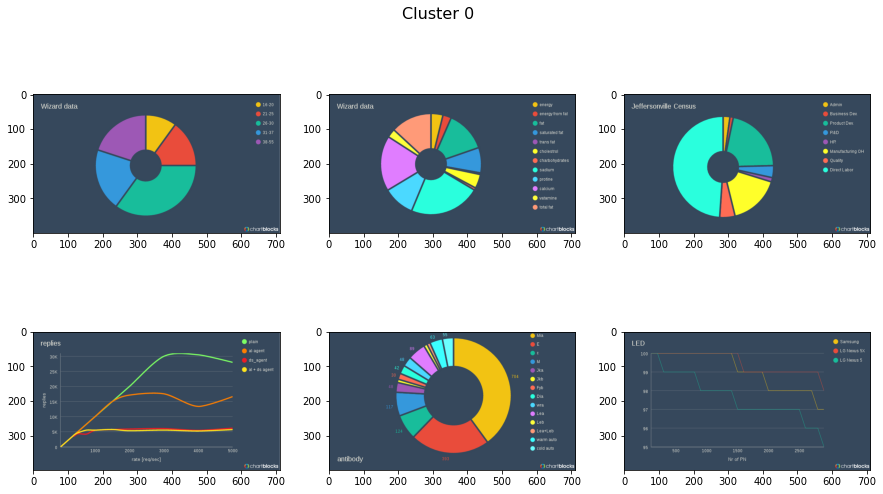

In [115]:
plotcluster(X, clusters, 0, imshape)

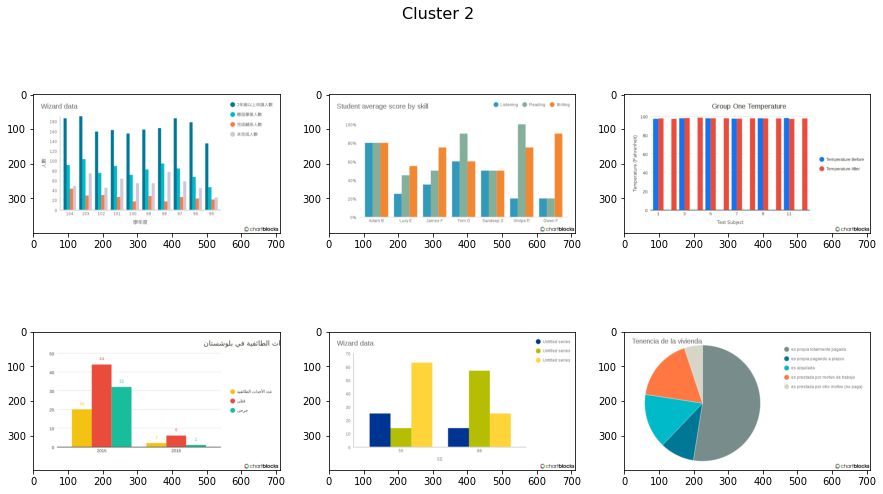

In [119]:
plotcluster(X, clusters, 2, imshape)

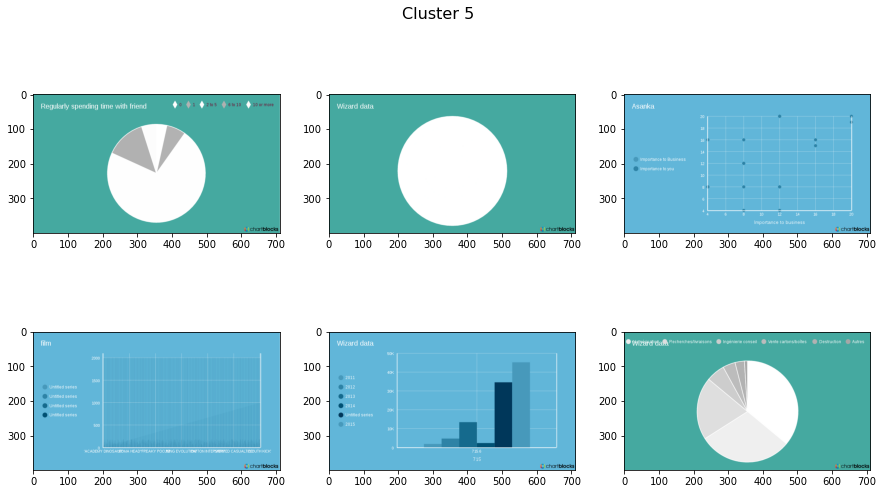

In [117]:
plotcluster(X, clusters, 5, imshape)

In [125]:
images = np.random.choice(files, 400)
im1 = imread(os.path.join(folder, images[0]))
imshape = im1.shape
X = np.empty(shape=(len(images), imshape[0]*imshape[1]*imshape[2]))
for i, img in enumerate(images):
    pixels = imread(os.path.join(folder, img))
    X[i,:] = pixels.ravel()
    
k = 9
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
clusters = kmeans.labels_

cluster_groups = {i: [] for i in range(k)}
for i, cluster_label in enumerate(clusters):
    cluster_groups[cluster_label].append(i)
    
def plotcluster(X, cl, c, imshape):
    plt.figure(figsize=(15, 8))
    plt.suptitle('Cluster ' + str(c), fontsize=16)
    Xcl = X[cl == c]
    inds = np.random.choice(Xcl.shape[0], min(6, Xcl.shape[0]), replace=False)
    
    for i, ind in enumerate(inds):
        ax = plt.subplot(2, 3, i+1)
        img_array = Xcl[ind, :].reshape(imshape)
        ax.imshow(img_array)
        # ax.axis('off')

    plt.show()

/Users/changxinyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


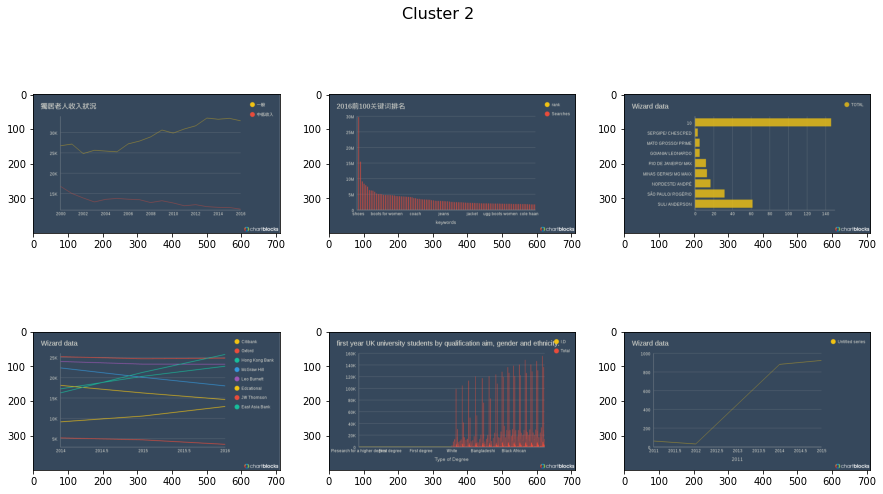

In [129]:
plotcluster(X, clusters, 2, imshape)

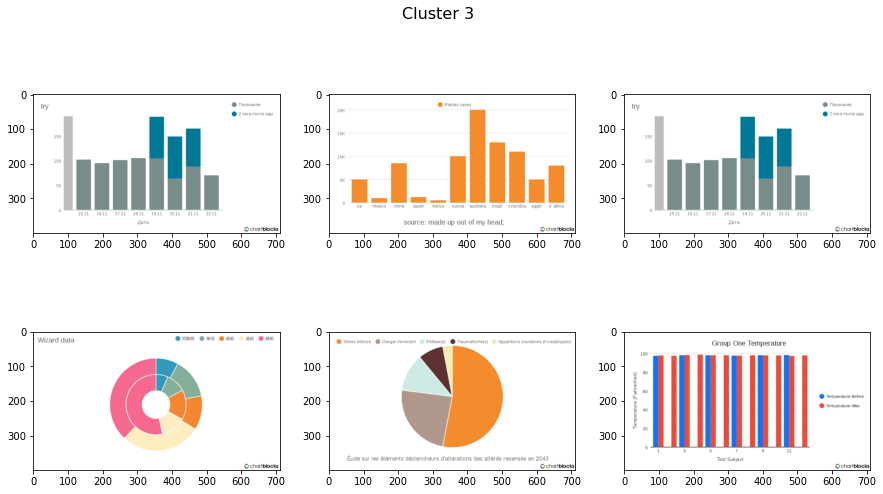

In [130]:
plotcluster(X, clusters, 3, imshape)

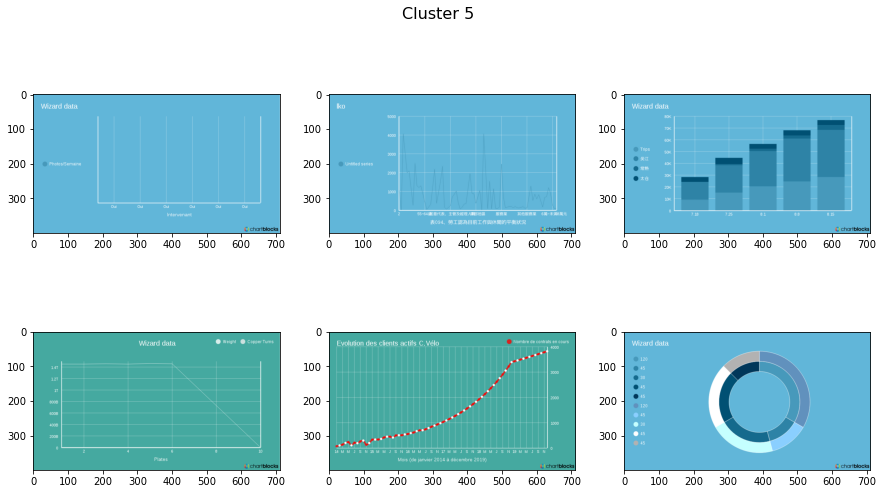

In [131]:
plotcluster(X, clusters, 5, imshape)

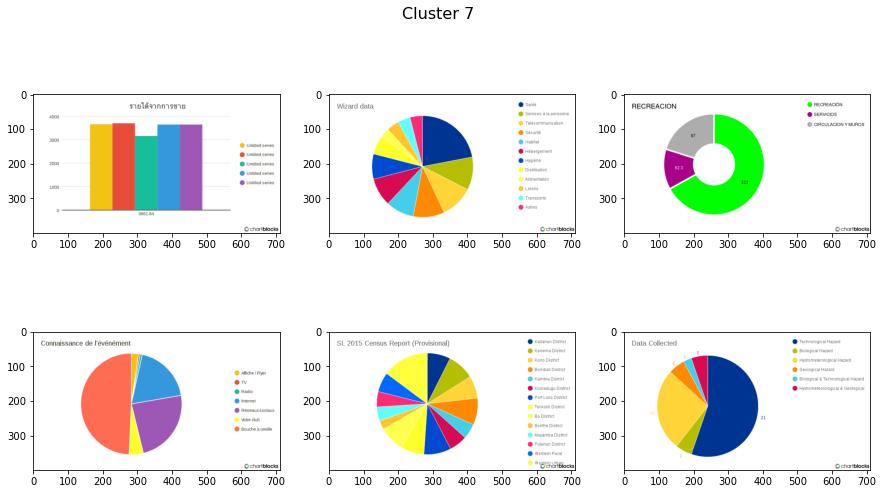

In [132]:
plotcluster(X, clusters, 7, imshape)

Here’s a general explanation of what we can infer from the provided images of clusters with different k values:

**For sample = 400, k = 7:**  
(1) Cluster 0: Contains mostly circular charts like pie charts and donut charts, which are likely grouped based on their shape and the circular distribution of data points.  
(2) Cluster 2: Features a mix of bar charts and pie charts, suggesting the algorithm may be picking up on similarities in color and distribution of categorical data.  
(3) Cluster 5: Appears to include sparse scatter plots and bar charts with plenty of whitespace, likely grouped due to the presence of grid lines and scattered data points.  
(4) Cluster 7: Comprises colorful pie charts and bar charts, which seem to be grouped due to the variety of colors and segments represented.  

**For sample = 400, k = 9:**  
**The increase in k typically allows the algorithm to create more specific groups, potentially leading to more homogeneous clusters.**  
(1) Cluster 0: Seems to consist of line charts, possibly grouped because of their trend lines and less colorful appearance.  
(2) Cluster 2: Includes bar charts with different orientations and colors, which might indicate a focus on the layout and color scheme similarities.  
(3) Cluster 3: This cluster might have pie charts and bar charts, suggesting a mix based on the segmentation of data and possibly the color schemes used.  
(4) Cluster 5: Contains charts with a lot of whitespace and grid lines, similar to Cluster 5 with k=7, but with potentially more specificity in the type of sparsity and layout.

The clusters contain visualizations that the algorithm deems similar based on the extracted features from the images, which may include colors, shapes, and the distribution of elements within each chart. **As k increases, the clusters become more defined and specific, separating different types of visualizations more distinctly.When clustering images like these, the choice of k can significantly affect the homogeneity and interpretability of the clusters. A smaller k might lead to very broad groups, while a larger k can result in too many small, possibly overlapping clusters. The ideal k would balance between these extremes, providing distinct, meaningful groupings that reflect the different types of visualizations present in the dataset.**

-----------------------------

## 3 Images: Reduce the number of colors

#### 3.1 Get a color image that you choose, load it as a matrix, and display it using matplotlib.

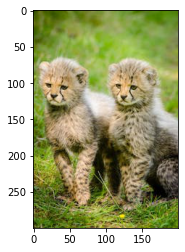

In [140]:
pixels = imread("animal.jpg")
ax = plt.axes()
ax.set_aspect('equal')
_ = plt.imshow(pixels)
_ = plt.show()

#### 3.2 Get this code to work with your image and understand what it does. Explain: 

In [141]:
pixels.shape

(300, 200, 3)

In [142]:
M = pixels.reshape((-1,pixels.shape[2]))
print(M.shape)

(60000, 3)


In [143]:
m = KMeans(16).fit(M)
cl = m.predict(M)
centers = m.cluster_centers_
print("center color values:\n", centers)

/Users/changxinyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


center color values:
 [[217.49918963 199.31474878 172.30632091]
 [109.83733025 101.07830107  60.88702687]
 [ 20.84508627  19.5723931    4.52625656]
 [163.41268857 185.58235173  91.48811738]
 [119.34158654 143.96490385  52.484375  ]
 [ 82.98987982  75.96173308  40.52055661]
 [227.54414784 221.63655031 213.32854209]
 [181.40240498 165.27549925 128.64977453]
 [139.85090218 163.94808484  75.84821146]
 [135.34133837 123.716136    85.79357798]
 [ 99.48841827 127.37943966  22.42223693]
 [137.72989782 169.47889827  41.3251888 ]
 [ 75.19351935 100.33453345   9.33723372]
 [ 53.74226153  52.94535692  14.84775742]
 [160.02273265 144.85460573 108.32322993]
 [201.87644702 183.03561888 145.69033838]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


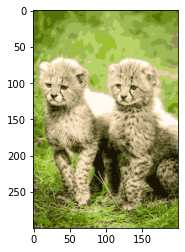

In [145]:
compressed = centers[cl]/225
compressed = compressed.reshape(pixels.shape)
ax = plt.axes()
ax.set_aspect("equal")
_ = plt.imshow(compressed)
_ = plt.show()

#### (a) (0.4 point) What does the shape of pixels mean?

In general, the shape of a pixels array—commonly in the format of (height, width, channels)—describes the dimensions of an image, where 'height' is the number of pixel rows, 'width' is the number of pixel columns, and 'channels' indicates the depth of color information per pixel (e.g., 3 for an RGB image). 

In my question, the shape of the pixels array—(300, 200, 3)—provides important information about the structure and content of the image in terms of how it is stored in the array:  
(1) 300: The first number represents the height of the image, indicating that there are 300 rows of pixels from top to bottom.  
(2) 200: The second number is the width of the image, showing that there are 200 columns of pixels from left to right.  
(3) 3: The third number indicates the depth of the image, which is the number of color channels. An image with a depth of 3 is typically in RGB format, meaning that each pixel is composed of three values corresponding to the red, green, and blue color intensities.  

Together, these dimensions mean that the image is a 300 pixels high by 200 pixels wide color image, and each pixel contains 3 values for color representation. The values in each color channel typically range from 0 to 255, where 0 represents no intensity and 255 represents full intensity of that color.

In the sample work, the shape of the pixels array—(699, 960, 3)—provides important information about the structure and content of the image in terms of how it is stored in the array:   
(1) 699: The first number represents the height of the image, indicating that there are 699 rows of pixels from top to bottom.  
(2) 960: The second number is the width of the image, showing that there are 960 columns of pixels from left to right.  
(3) 3: The third number indicates the depth of the image, which is the number of color channels. An image with a depth of 3 is typically in RGB format, meaning that each pixel is composed of three values corresponding to the red, green, and blue color intensities.  

#### (b) (0.4 point) What is matrix M? Why does it have 671,040 rows and 3 columns in this example?

Matrix M is the result of reshaping the original three-dimensional image array into a two-dimensional array for processing. It has 671040 rows and 3 columns in the example because the original image has a shape of (699, 960, 3), which indicates it is 699 pixels in height, 960 pixels in width, and has 3 color channels (RGB).

When we reshape this array with the “.reshape((-1, pixels.shape[2]))” operation, we are collapsing the height and width dimensions into a single dimension, where each row now represents one pixel, and the 3 columns correspond to the RGB values of that pixel. The -1 in the reshape method tells NumPy to calculate the size of this new merged dimension based on the size of the original array and the other given dimension **(which is 3, for the RGB channels).** The total number of rows thus becomes the product of the image's height and width:

**699(height) × 960 (width) = 671040**

Each row of this matrix M is a pixel with its own RGB color information, which can be used for color clustering or other image processing tasks. The reason for this reshaping is to transform the image data into a format that can be used by machine learning algorithms, which typically expect input data in a two-dimensional format, with individual samples (in this case, pixels) as rows and features (in this case, color channels) as columns.

#### (c) (0.4 point) What do cl values tell us? E.g. if cl[12345] = 2, what does it mean?

The cl values are the cluster labels assigned to each pixel(find the cluster id for each pixel) in the image after the k-means algorithm has been applied. For example, if cl[12345] = 2, this means that the pixel at index 12345 in the flattened image array has been assigned to cluster number 2. Importantly, cl is a vector where each element corresponds to a pixel from the original image and the value represents the cluster that the pixel is most closely associated with based on its color.

#### (d) (0.4 point) What are the columns of “center color values” printed above? E.g. the first row, second column is value 163.37. What does that number mean?

The columns of "center color values" represent the RGB components of the centroids of the color clusters identified by the k-means algorithm. Each row represents one centroid (or 'center color value') for one of the clusters. The first row, second column value of 163.37 refers to the green component of the RGB color of the first cluster center. So, in RGB terms, if the first cluster's center has a red value of 176.68 (first column), a green value of 163.37 (second column), and a blue value of 113.19 (third column), these values combined represent the average color of all the pixels assigned to this cluster.

#### (e) (0.4 point) How many “center color values” are there? Why do we have this number?

There are 16 "center color values" because the k-means clustering was instructed to find 16 clusters. Each "center color value" is the centroid of one cluster and is represented by three numbers corresponding to the RGB color channels. We have 16 of these because that was the specified number of clusters to reduce the color palette to; this number can be chosen based on how many colors we want the final image to represent and can significantly affect the appearance of the compressed image. The goal is to represent the original range of colors in the image with a smaller, more manageable set of colors that approximates the original distribution as closely as possible.

#### 3.3. (2 points) Next repeat the above by reducing the number of colors to 2, and 4. Show the pictures! Hint: make a function that takes the number of colors as an argument, then you don’t have to copy- paste your code.

In [146]:
def image_color_cluster(image_path, n_colors):
    pixels = imread(image_path)
    M = pixels.reshape((-1, pixels.shape[2]))
    kmeans = KMeans(n_clusters=n_colors, random_state=42).fit(M)
    new_colors = kmeans.cluster_centers_[kmeans.predict(M)]
    compressed_image = new_colors.reshape(pixels.shape)
    
    plt.figure()
    plt.imshow(compressed_image.astype('uint8'))
    plt.show()

/Users/changxinyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


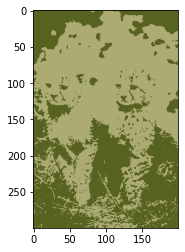

In [147]:
image_color_cluster('animal.jpg', 2)

/Users/changxinyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


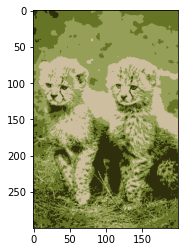

In [148]:
image_color_cluster('animal.jpg', 4)

## Finally: How much time did you spend on this problem set?

I spent almost 6 hours on this problem set. Thanks for all the help this quarter from Professor Aylin, Yiwei, and Yubing! Happy Winter Break! ：）